In [1]:
from google.colab import drive
drive.mount('/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

Mounted at /drive


In [2]:
HOME = "/drive/My Drive/Susun Jadwal/Data csv/"

course_sched = pd.read_csv(HOME+"course_schedule.csv")
course_sched.head(2)

,id_schedule,course_name,class_name,course_id,day,start,end,sks,id_user
0,6104d2cf8aadd383ec57d3c3,Desain & Analisis Algoritma,DAA A,10779.0,Senin,13.0,14.4,4,60f4f2b38cd53dc0e3b371ba
1,6104d2cf8aadd383ec57d3c3,Desain & Analisis Algoritma,DAA A,10779.0,Rabu,8.0,9.4,4,60f4f2b38cd53dc0e3b371ba


In [3]:
sched = course_sched[['day','start']].sort_values(by='day')
sched.head(2)

,day,start
25363,Jumat,11.0
30630,Jumat,8.0


In [4]:
# Reference : https://www.britannica.com/dictionary/eb/qa/parts-of-the-day-early-morning-late-morning-etc
def split_day(x):
  if 7 <= x < 11:
    return "Morning"
  elif 11 <= x < 15:
    return "Day"
  elif 15 <= x < 18:
    return "Afternoon"

In [5]:
# Data for plot time trend
sched['start'] = sched['start'].apply(split_day)

In [6]:
group_sched = sched.groupby(['day','start'])['start'].count().rename('Count').reset_index()
group_sched.columns = ['Day','Time',"Count"]
group_sched.head()

,Day,Time,Count
0,Jumat,Afternoon,701
1,Jumat,Day,2324
2,Jumat,Morning,3833
3,Kamis,Afternoon,1854
4,Kamis,Day,3728


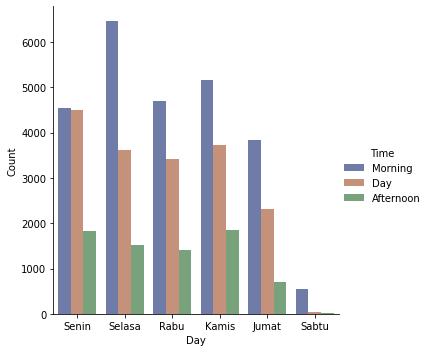

In [7]:
sns.catplot(
    data=group_sched, kind="bar",
    x="Day", y="Count", hue="Time",
    ci="sd", palette="dark", alpha=.6, height=5,
    order=['Senin','Selasa','Rabu','Kamis','Jumat','Sabtu'],
    hue_order = ['Morning','Day','Afternoon'])